In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "Bengaluru_House_data.csv"
df_raw = pd.read_csv(path)
df_raw.shape

(13320, 9)

In [2]:
df_raw.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
df_raw.tail()

area_type   availability               location       size  \
13315        Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13316  Super built-up  Area  Ready To Move          Richards Town      4 BHK   
13317        Built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   
13318  Super built-up  Area         18-Jun        Padmanabhanagar      4 BHK   
13319  Super built-up  Area  Ready To Move           Doddathoguru      1 BHK   

       society total_sqft  bath  balcony  price  
13315  ArsiaEx       3453   4.0      0.0  231.0  
13316      NaN       3600   5.0      NaN  400.0  
13317  Mahla T       1141   2.0      1.0   60.0  
13318  SollyCl       4689   4.0      1.0  488.0  
13319      NaN        550   1.0      1.0   17.0

In [4]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe()

bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000

In [6]:
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("________________________")

value_count(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
________________________
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
________________________
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
________________________
si

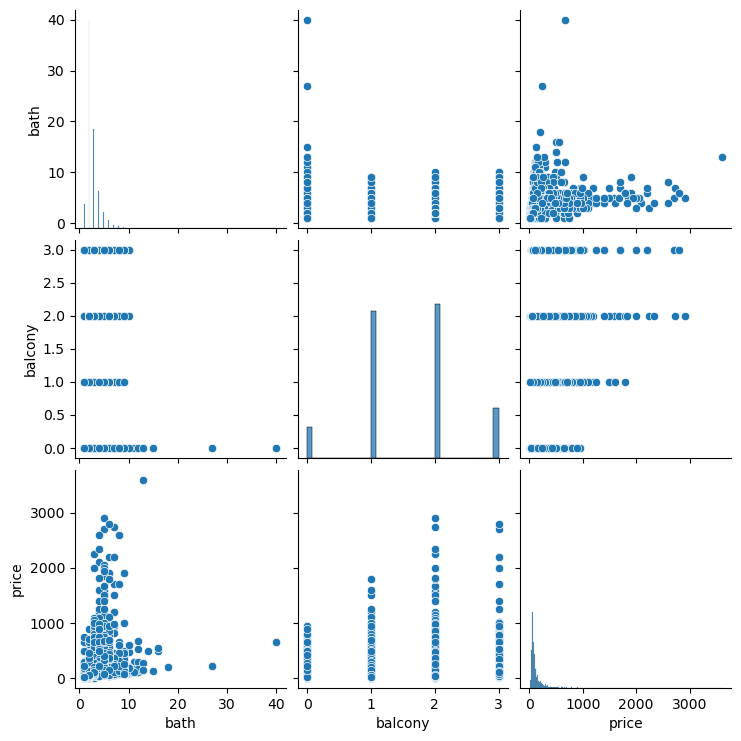

In [7]:
sns.pairplot(df)

<Axes: >

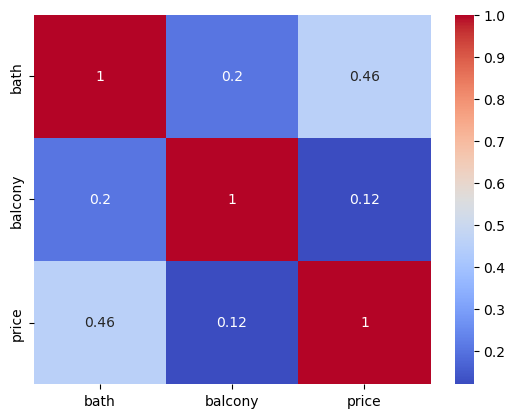

In [8]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(), cmap = "coolwarm", annot = True)

In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
df.isnull().mean() * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [11]:
df2 = df.drop('society', axis = 'columns') #loại đi trường society vì tỉ lệ null cao (41%)
df2.shape

(13320, 8)

In [12]:
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()
#thay thế giá trị null trong trường balcony bằng giá trị trung bình của các giá trị not null

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [13]:
df3 = df2.dropna() #xóa đi các hàng mà có giá trị nan (không có giá trị)
df3.shape

(13246, 8)

In [14]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [47]:
#pd.set_option("display.max_rows", None)
#pd.set_option("display.max_columns", None)
# Cho phép in ra toàn bộ các giá trị output có thể của câu lệnh

df3['total_sqft'].value_counts()

total_sqft
1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225          

In [48]:
total_sqft_float = []
for str_val in df3['total_sqft']:
    try:
        total_sqft_float.append(float(str_val))
    except:
        try:
            temp = []
            temp = str_val.split('-')
            A = float(temp[0]) + float(temp[1])
            A = A / 2
            total_sqft_float.append(A)
        except:
            total_sqft_float.append(np.nan)
            
df4 = df3.reset_index(drop = True)

In [49]:
df5 = df4.join(pd.DataFrame({'total_sqft_float' : total_sqft_float}))
df5.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

  total_sqft  bath  balcony   price  total_sqft_float  
0       1056   2.0      1.0   39.07            1056.0  
1       2600   5.0      3.0  120.00            2600.0  
2       1440   2.0      3.0   62.00            1440.0  
3       1521   3.0      1.0   95.00            1521.0  
4       1200   2.0      1.0   51.00            1200.0

In [50]:
df5.isnull().sum()

area_type            0
availability         0
location             0
size                 0
total_sqft           0
bath                 0
balcony              0
price                0
total_sqft_float    46
dtype: int64

In [51]:
df6 = df5.dropna()
df6.shape

(13200, 9)

In [52]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         13200 non-null  object 
 1   availability      13200 non-null  object 
 2   location          13200 non-null  object 
 3   size              13200 non-null  object 
 4   total_sqft        13200 non-null  object 
 5   bath              13200 non-null  float64
 6   balcony           13200 non-null  float64
 7   price             13200 non-null  float64
 8   total_sqft_float  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [53]:
df6['size'].value_counts()

size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [54]:
size_int = []
for str_val in df6['size']:
    temp = []
    temp = str_val.split(" ")
    try:
        size_int.append(int(temp[0]))
    except:
        size_int.append(np.nan)
        print("Noice = ", str_val)
             
df6 = df6.reset_index(drop = True)

In [55]:
df7 = df6.join(pd.DataFrame({'bhk' : size_int}))
df7.shape

(13200, 10)

In [56]:
df7.tail()

area_type   availability               location       size  \
13195        Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13196  Super built-up  Area  Ready To Move          Richards Town      4 BHK   
13197        Built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   
13198  Super built-up  Area         18-Jun        Padmanabhanagar      4 BHK   
13199  Super built-up  Area  Ready To Move           Doddathoguru      1 BHK   

      total_sqft  bath   balcony  price  total_sqft_float  bhk  
13195       3453   4.0  0.000000  231.0            3453.0    5  
13196       3600   5.0  1.584376  400.0            3600.0    4  
13197       1141   2.0  1.000000   60.0            1141.0    2  
13198       4689   4.0  1.000000  488.0            4689.0    4  
13199        550   1.0  1.000000   17.0             550.0    1

<Axes: xlabel='total_sqft_float'>

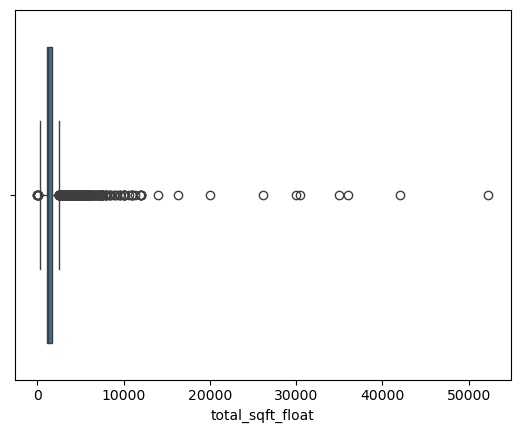

In [57]:
sns.boxplot(x = df7['total_sqft_float']) #xem xét trường diện tích

In [58]:
A = df7['total_sqft_float'] / df7['bhk'] < 350
df7[A].head()

area_type   availability         location       size  \
9             Plot  Area  Ready To Move     Gandhi Bazar  6 Bedroom   
26  Super built-up  Area  Ready To Move  Electronic City      2 BHK   
29  Super built-up  Area  Ready To Move  Electronic City      3 BHK   
45            Plot  Area  Ready To Move       HSR Layout  8 Bedroom   
57            Plot  Area  Ready To Move    Murugeshpalya  6 Bedroom   

   total_sqft  bath   balcony  price  total_sqft_float  bhk  
9        1020   6.0  1.584376  370.0            1020.0    6  
26        660   1.0  1.000000   23.1             660.0    2  
29       1025   2.0  1.000000   47.0            1025.0    3  
45        600   9.0  1.584376  200.0             600.0    8  
57       1407   4.0  1.000000  150.0            1407.0    6

In [59]:
A = ~(df7['total_sqft_float'] / df7['bhk'] < 350)
df8 = df7[A]
df8.shape

(12106, 10)

In [60]:
df8['price_per_sqft'] = df8['price'] * 100000 / df8['total_sqft_float']
df8.head()

C:\Users\Dell 5520\AppData\Local\Temp\ipykernel_9336\995840505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft'] = df8['price'] * 100000 / df8['total_sqft_float']


area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

  total_sqft  bath  balcony   price  total_sqft_float  bhk  price_per_sqft  
0       1056   2.0      1.0   39.07            1056.0    2     3699.810606  
1       2600   5.0      3.0  120.00            2600.0    4     4615.384615  
2       1440   2.0      3.0   62.00            1440.0    3     4305.555556  
3       1521   3.0      1.0   95.00            1521.0    3     6245.890861  
4       1200   2.0      1.0   51.00            1200.0    2     4250.000000

In [61]:
df8.shape

(12106, 11)

In [62]:
df8.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

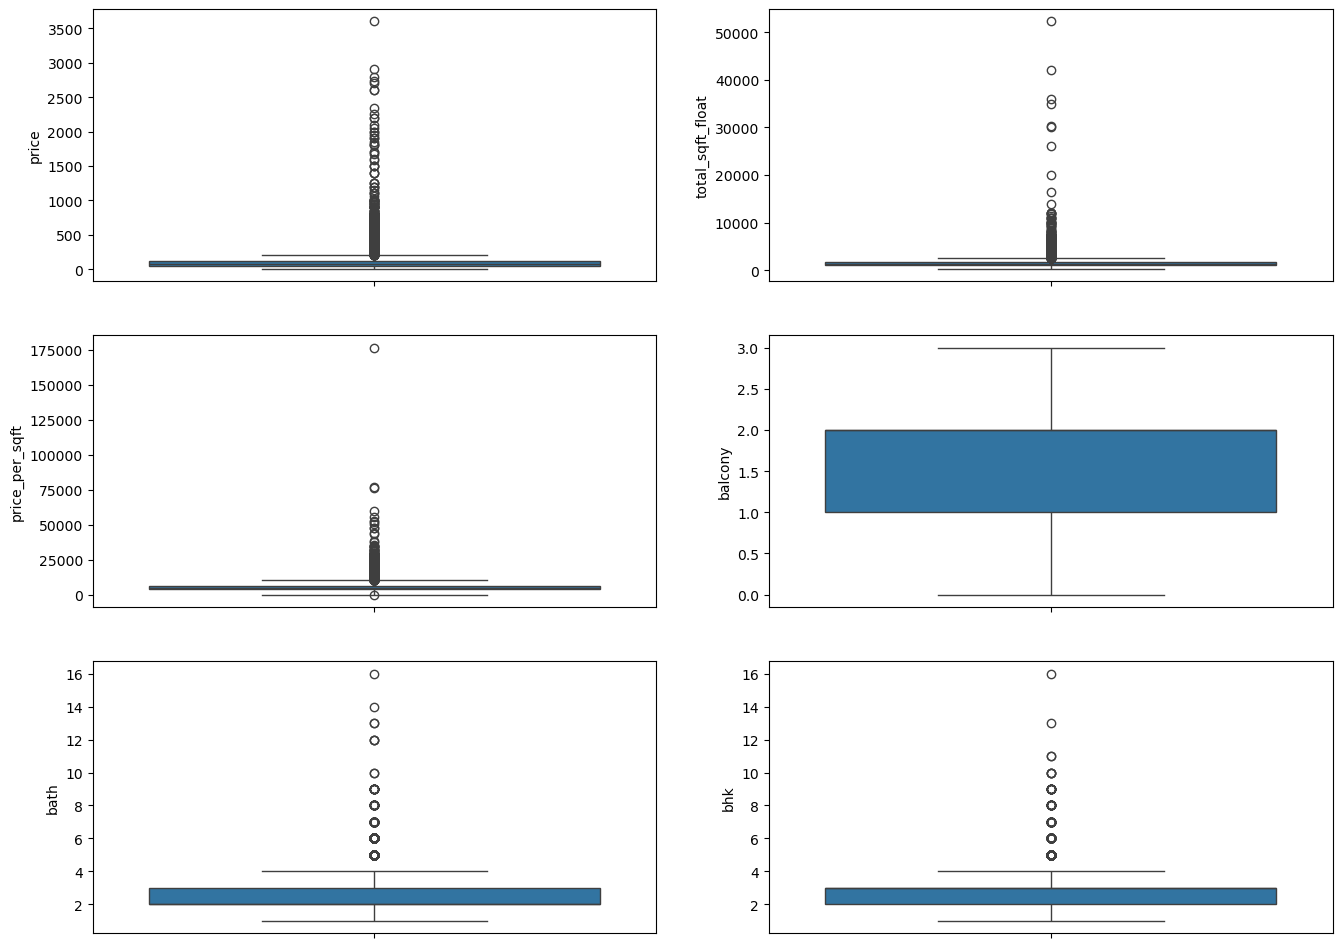

In [63]:
vars = ['price', 'total_sqft_float', 'price_per_sqft', 'balcony', 'bath', 'bhk']
plt.figure(figsize=(16, 12))

for i in range(len(vars)):
    var = vars[i]
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df8[var])

In [64]:
def remove_pps_outliers(df):
    df_copy = pd.DataFrame()
    for i, dfA in df.groupby('location'):
        mean = np.mean(dfA.price_per_sqft)
        std = np.std(dfA.price_per_sqft)
        reduced_df = dfA[((mean - std) <= dfA.price_per_sqft) & (dfA.price_per_sqft <= (mean + std))]
        df_copy = pd.concat([df_copy, reduced_df], ignore_index = True)

    return df_copy
df9 = remove_pps_outliers(df8)
df9.shape

(9421, 11)

In [65]:
def remove_bhk_outliers(df):
    temp = np.array([])
    
    for key, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for i, bhk_df in location_df.groupby('bhk'):
            bhk_stats[i] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            
        for i, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(i - 1)
            if stats and stats['count'] > 5:
                temp = np.append(
                    temp,
                    bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(temp, axis = 'index')
    
df10 = remove_bhk_outliers(df9)
df10.shape

(7727, 11)

## 🧭 Quy tắc nhận diện Outliers

Hàm muốn loại bỏ những căn có **price_per_sqft** không hợp lý khi so sánh giữa các căn có số phòng khác nhau trong cùng một **khu vực**.  

**Ý tưởng:**  
Nếu một căn *bhk* (ví dụ 3 BHK) có `price_per_sqft` **thấp hơn mức trung bình** của các căn *bhk-1* (ví dụ 2 BHK) trong cùng `location`,  
thì căn đó có thể được xem là **outlier** *(không hợp lý về giá theo m²)*.


### Hàm muốn loại bỏ những căn có price_per_sqft không hợp lý khi so sánh giữa các căn có số phòng khác nhau trong cùng một khu vực. Ý tưởng: nếu một căn bhk (ví dụ 3 BHK) có price_per_sqft thấp hơn mức trung bình của các căn bhk-1 (ví dụ 2 BHK) trong cùng location, thì đó có thể là outlier (không hợp lý về giá theo m2).

In [66]:
df10.bath.unique()

array([ 1.,  3.,  2.,  9., 12.,  4., 13.,  5.,  8.,  6.,  7., 16.])

In [67]:
A = df10.bath > df10.bhk + 2
df10[A]

area_type   availability           location       size  \
1976        Built-up  Area  Ready To Move      Chikkabanavar  4 Bedroom   
6162        Built-up  Area  Ready To Move         Nagasandra  4 Bedroom   
7507  Super built-up  Area  Ready To Move  Sathya Sai Layout      6 BHK   
8020  Super built-up  Area  Ready To Move        Thanisandra      3 BHK   

     total_sqft  bath   balcony   price  total_sqft_float  bhk  price_per_sqft  
1976       2460   7.0  2.000000    80.0            2460.0    4     3252.032520  
6162       7000   8.0  1.584376   450.0            7000.0    4     6428.571429  
7507      11338   9.0  1.000000  1000.0           11338.0    6     8819.897689  
8020       1806   6.0  2.000000   116.0            1806.0    3     6423.034330

In [68]:
A = df10.bath < df10.bhk + 2
df11 = df10[A]
df11.shape

(7647, 11)

In [69]:
df11.head()

area_type   availability              location   size  \
0        Built-up  Area  Ready To Move                Anekal   1 RK   
1  Super built-up  Area  Ready To Move             Banaswadi   1 RK   
2  Super built-up  Area  Ready To Move           Basavangudi   1 RK   
3  Super built-up  Area  Ready To Move   Devarabeesana Halli  3 BHK   
4        Built-up  Area  Ready To Move   Devarabeesana Halli  3 BHK   

  total_sqft  bath  balcony  price  total_sqft_float  bhk  price_per_sqft  
0        351   1.0      1.0   16.0             351.0    1     4558.404558  
1        527   1.0      0.0   35.0             527.0    1     6641.366224  
2        670   1.0      1.0   50.0             670.0    1     7462.686567  
3       1672   3.0      2.0  150.0            1672.0    3     8971.291866  
4       1750   3.0      3.0  149.0            1750.0    3     8514.285714

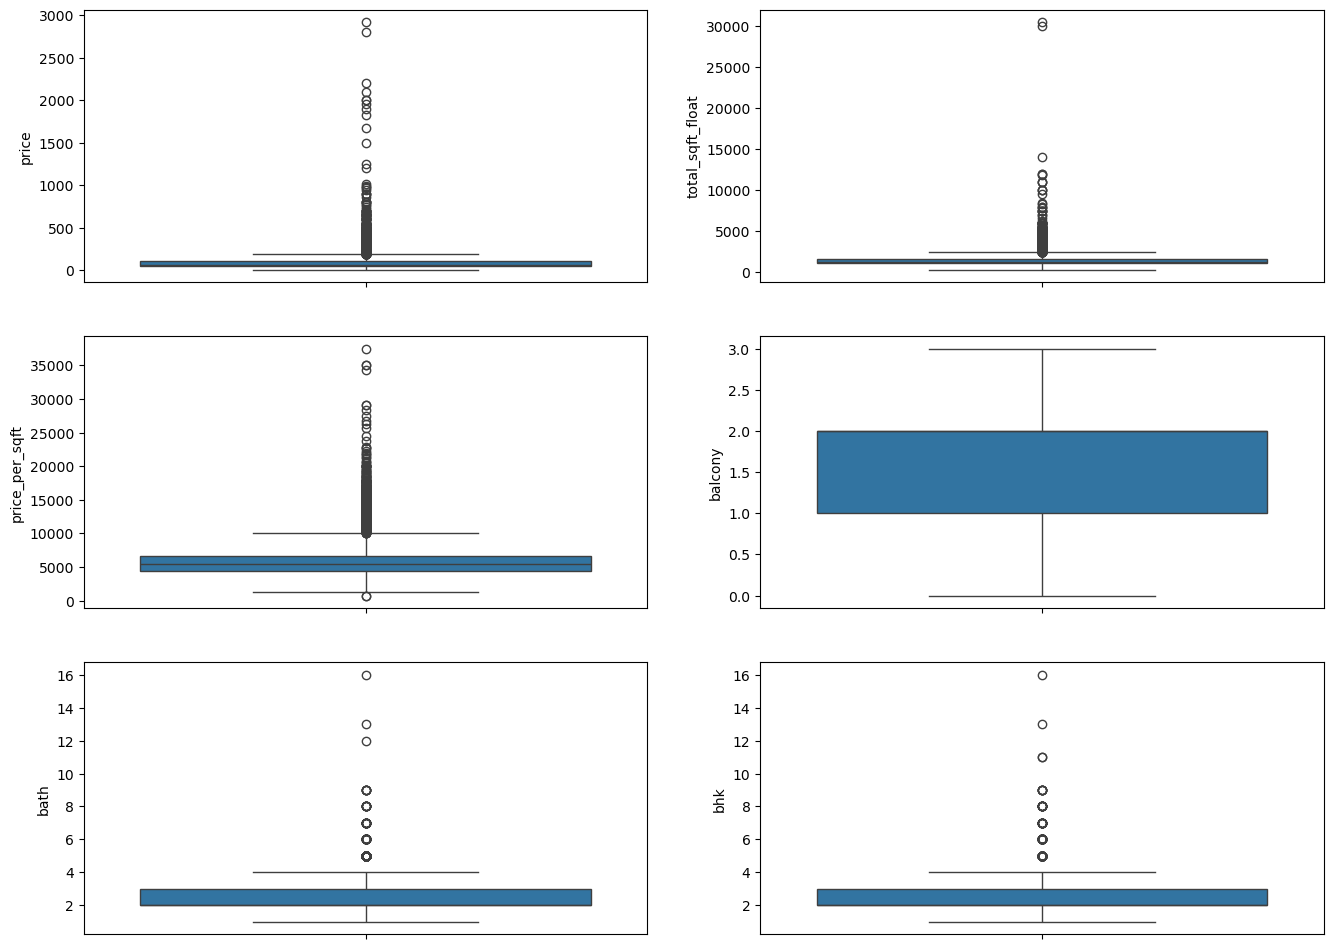

In [70]:
vars = ['price', 'total_sqft_float', 'price_per_sqft', 'balcony', 'bath', 'bhk']
plt.figure(figsize=(16, 12))

for i in range(len(vars)):
    var = vars[i]
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df11[var])

In [71]:
df12 = df11.drop(['area_type', 'availability', 'location', 'size', 'total_sqft'], axis = 1)
df12.head()

bath  balcony  price  total_sqft_float  bhk  price_per_sqft
0   1.0      1.0   16.0             351.0    1     4558.404558
1   1.0      0.0   35.0             527.0    1     6641.366224
2   1.0      1.0   50.0             670.0    1     7462.686567
3   3.0      2.0  150.0            1672.0    3     8971.291866
4   3.0      3.0  149.0            1750.0    3     8514.285714

In [72]:
df12.to_csv("clean_data.csv", index = False)

In [73]:
df9


area_type   availability  \
0           Built-up  Area  Ready To Move   
1     Super built-up  Area  Ready To Move   
2     Super built-up  Area  Ready To Move   
3     Super built-up  Area  Ready To Move   
4           Built-up  Area  Ready To Move   
5     Super built-up  Area  Ready To Move   
6     Super built-up  Area         18-May   
7     Super built-up  Area  Ready To Move   
8               Plot  Area  Ready To Move   
9     Super built-up  Area  Ready To Move   
10    Super built-up  Area  Ready To Move   
11    Super built-up  Area  Ready To Move   
12    Super built-up  Area  Ready To Move   
13    Super built-up  Area  Ready To Move   
14    Super built-up  Area  Ready To Move   
15    Super built-up  Area  Ready To Move   
16          Built-up  Area  Ready To Move   
17    Super built-up  Area  Ready To Move   
18    Super built-up  Area  Ready To Move   
19          Built-up  Area  Ready To Move   
20          Built-up  Area  Ready To Move   
21    Super built-up  Area  Ready To Move   
22    Super built-up  Area  Ready To Move   
23    Super built-up  Area         20-Aug   
24    Super built-up  Area         18-May   
25    Super built-up  Area  Ready To Move   
26    Super built-up  Area         18-Nov   
27    Super built-up  Area         21-Nov   
28          Built-up  Area         17-Jun   
29              Plot  Area  Ready To Move   
30          Built-up  Area  Ready To Move   
31    Super built-up  Area  Ready To Move   
32    Super built-up  Area  Ready To Move   
33    Super built-up  Area  Ready To Move   
34              Plot  Area  Ready To Move   
35    Super built-up  Area  Ready To Move   
36    Super built-up  Area  Ready To Move   
37    Super built-up  Area  Ready To Move   
38          Built-up  Area  Ready To Move   
39    Super built-up  Area  Ready To Move   
40    Super built-up  Area         20-May   
41    Super built-up  Area         18-Jun   
42    Super built-up  Area  Ready To Move   
43          Built-up  Area         15-Dec   
44    Super built-up  Area         18-Jun   
45    Super built-up  Area         20-May   
46    Super built-up  Area         20-May   
47          Built-up  Area  Ready To Move   
48          Built-up  Area  Ready To Move   
49    Super built-up  Area         18-Dec   
50          Built-up  Area         18-Mar   
51    Super built-up  Area  Ready To Move   
52    Super built-up  Area  Ready To Move   
53    Super built-up  Area  Ready To Move   
54    Super built-up  Area  Ready To Move   
55    Super built-up  Area  Ready To Move   
56    Super built-up  Area  Ready To Move   
57    Super built-up  Area  Ready To Move   
58    Super built-up  Area  Ready To Move   
59    Super built-up  Area         18-May   
60              Plot  Area  Ready To Move   
61          Built-up  Area  Ready To Move   
62    Super built-up  Area         18-May   
63    Super built-up  Area  Ready To Move   
64    Super built-up  Area  Ready To Move   
65    Super built-up  Area  Ready To Move   
66          Built-up  Area  Ready To Move   
67    Super built-up  Area         18-May   
68    Super built-up  Area  Ready To Move   
69    Super built-up  Area  Ready To Move   
70    Super built-up  Area  Ready To Move   
71          Built-up  Area  Ready To Move   
72          Built-up  Area  Ready To Move   
73    Super built-up  Area         18-May   
74          Built-up  Area  Ready To Move   
75    Super built-up  Area  Ready To Move   
76            Carpet  Area  Ready To Move   
77    Super built-up  Area  Ready To Move   
78          Built-up  Area  Ready To Move   
79    Super built-up  Area  Ready To Move   
80    Super built-up  Area         18-Jul   
81    Super built-up  Area  Ready To Move   
82          Built-up  Area  Ready To Move   
83              Plot  Area         18-Mar   
84    Super built-up  Area  Ready To Move   
85    Super built-up  Area  Ready To Move   
86          Built-up  Area  Ready To Move   
87    Super built-up  Area  Ready To Move   
88    Super 

In [74]:
df9['location'].value_counts()

location
Whitefield                                         476
Sarjapur  Road                                     292
Electronic City                                    268
Kanakpura Road                                     190
Yelahanka                                          168
Uttarahalli                                        149
Marathahalli                                       149
Thanisandra                                        149
Bannerghatta Road                                  143
Raja Rajeshwari Nagar                              134
Hennur Road                                        130
Haralur Road                                       122
Electronic City Phase II                           118
Hebbal                                             113
7th Phase JP Nagar                                 101
Rajaji Nagar                                        70
Kasavanhalli                                        69
Chandapura                                          69
B

In [81]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    plt.figure(figsize = (16, 9))
    

    plt.scatter(bhk2.total_sqft_float, bhk2.price, color = 'b', marker = 'o', label = '2 BHK', s = 42)
    plt.scatter(bhk3.total_sqft_float, bhk3.price, color = 'r', marker = '+', label = '3 BHK', s = 90)

    plt.xlable('Tong dien tich')
    plt.ylable('Gia')
    plt.title(location)
    plt.legend()



AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

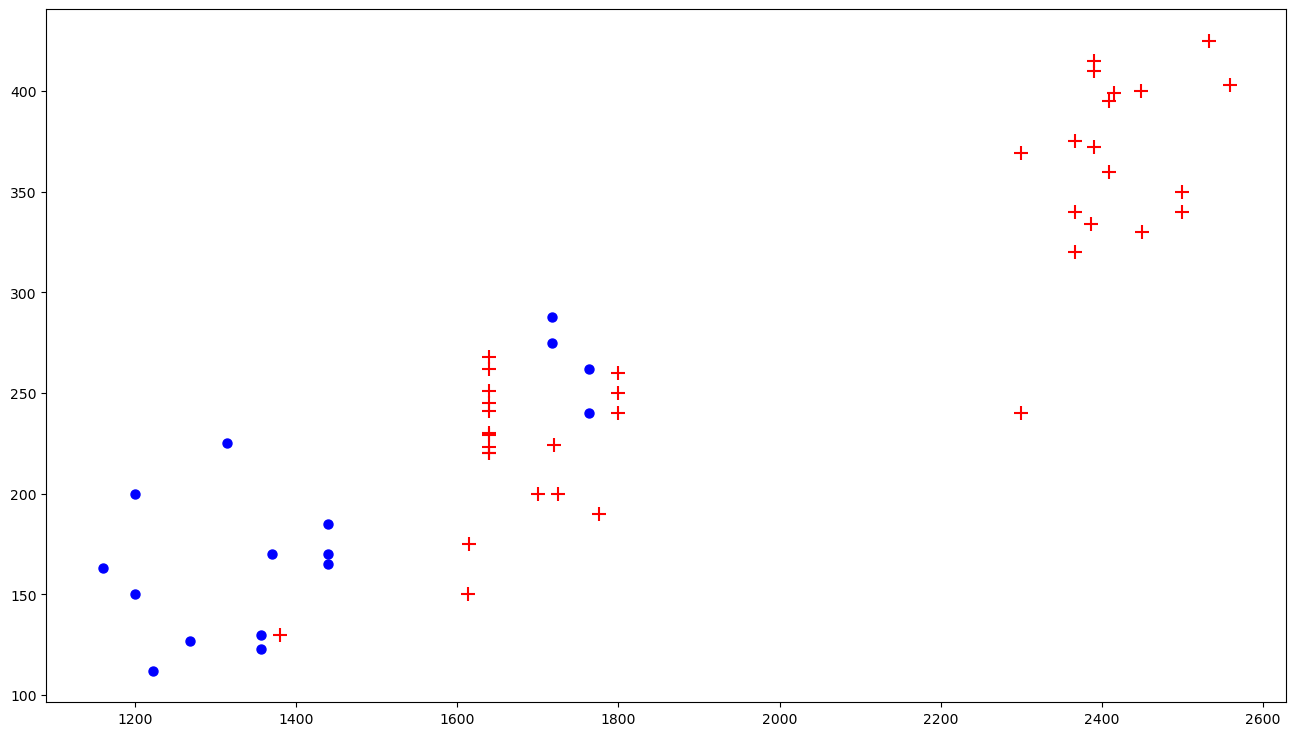

In [82]:
plot_scatter_chart(df9, "Rajaji Nagar")

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

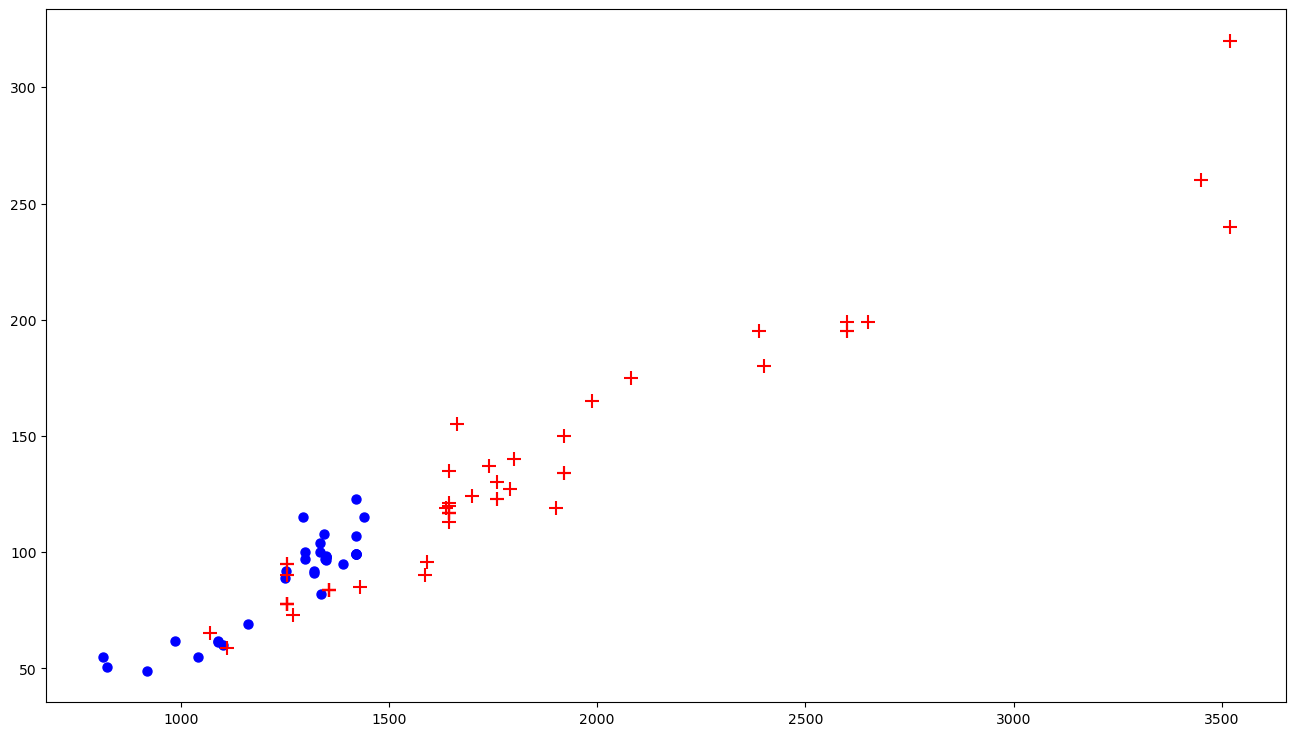

In [46]:
plot_scatter_chart(df9, "Hebbal")

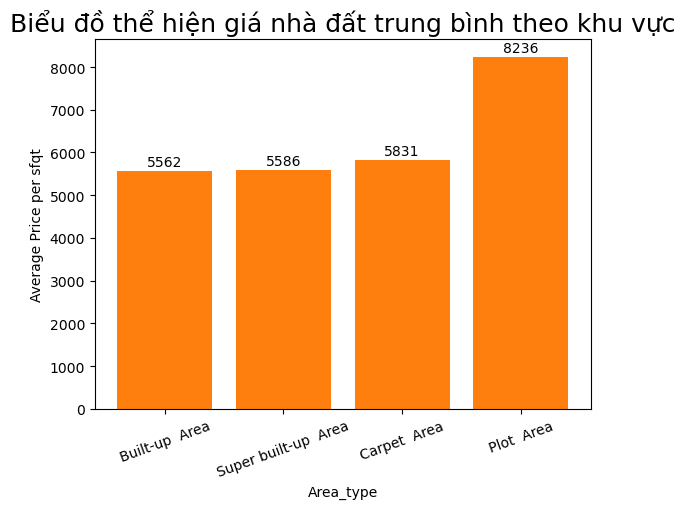

In [103]:

dfA = df9.groupby('area_type')
dfA = dfA['price_per_sqft'].mean()
dfA = dfA.sort_values()
bars = plt.bar(x.index, x.values)

bars = plt.bar(dfA.index, dfA.values)


plt.xlabel('Area_type')
plt.ylabel('Average Price per sfqt')
plt.xticks(rotation = 20)
plt.title('Biểu đồ thể hiện giá nhà đất trung bình theo khu vực', fontsize = 18)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, f'{yval:.0f}', ha = 'center', va = 'bottom', fontsize = 10)

plt.show()